In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
dataset.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [3]:
dataset.corr()

Level    Salary
Level   1.000000  0.817949
Salary  0.817949  1.000000

In [4]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

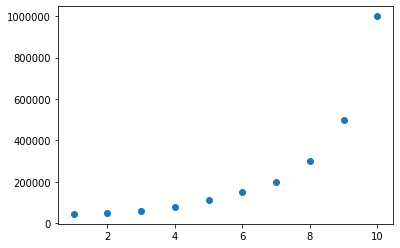

In [6]:
plt.scatter(x,y)

In [7]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly             #y=a0+a1x+a2x^2+a3x^3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [8]:
x_poly.shape

(10, 4)

In [9]:
pr=LinearRegression()
pr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred=pr.predict(x_poly)
y_pred

array([ 14902.09790208,  78759.9067599 ,  94960.37296038,  88223.77622379,
        83270.39627041, 104820.51282052, 177594.40559441, 326312.35431235,
       575694.63869463, 950461.53846153])

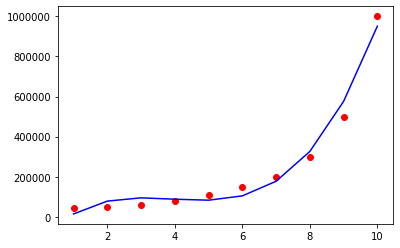

In [10]:
plt.scatter(x,y,color='red')
plt.plot(x,pr.predict(poly.fit_transform(x)),color='blue')
plt.show()

In [11]:
pr.predict(poly.fit_transform([[11]]))

array([1475333.33333333])

In [12]:
pr.predict([[1,11,121,1331]])

array([1475333.33333333])

In [16]:
r2_score(y,y_pred)

0.9812097727913366